# Análise de Absentismo - Call Center

**Objetivo:** Análise descritiva e prescritiva de padrões de absentismo.

**Dataset:** 1.3M registos, 3,135 colaboradores, 18 meses (2024-01 a 2025-06)

---

## GRUPO 4: MÉTRICAS CORE + ANÁLISE DE ATRASOS

### 4.1: Calcular Métricas Fundamentais (KPIs)

In [80]:
# Período de análise (usar df_base_absentismo que tem Trabalho Pago + Faltas)
data_inicio = df_base_absentismo['Data'].min()
data_fim = df_base_absentismo['Data'].max()
dias_calendario = (data_fim - data_inicio).days + 1
num_colaboradores = df_base_absentismo['login_colaborador'].nunique()

# Contar registos por tipo (NÃO precisamos expandir - já temos valores únicos!)
num_presencas = len(df_base_absentismo[df_base_absentismo['Nivel 1'] == 'Trabalho Pago'])
num_faltas = len(df_faltas)  # Já temos df_faltas do Grupo 2

# Contar ausências médicas (Nivel 2)
num_ausencias_medicas = len(df_faltas[df_faltas['Nivel 2'] == 'Ausência Médica'])

# Contar atrasos (usar df_atrasos do Grupo 1, mas filtrar apenas 'Atraso')
num_atrasos = len(df_atrasos[df_atrasos['Nivel 1'] == 'Atraso'])

# KPI 1: Taxa de Absentismo Global (já calculámos no Grupo 2, mas vamos reforçar)
taxa_absentismo_global = (num_faltas / (num_presencas + num_faltas)) * 100

# KPI 2: Lost Time Rate (dias perdidos por colaborador)
total_dias_perdidos = df_spells['duracao_dias'].sum()
lost_time_rate = total_dias_perdidos / num_colaboradores

# KPI 3: Frequency Rate (spells por colaborador)
frequency_rate = len(df_spells) / num_colaboradores

# KPI 4: Mean Spell Duration (duração média de cada episódio)
mean_spell_duration = df_spells['duracao_dias'].mean()

# KPI 5: Taxa de Atrasos
# Numerador: dias com atraso
num_atrasos = len(df_atrasos[df_atrasos['Nivel 1'] == 'Atraso'])

# Denominador: dias de trabalho pago
num_trabalho_pago = len(df_base_absentismo[df_base_absentismo['Nivel 1'] == 'Trabalho Pago'])

# Taxa
taxa_atrasos = (num_atrasos / num_trabalho_pago * 100) if num_trabalho_pago > 0 else 0

# KPI 6: Taxa de Zero Ausências
colaboradores_sem_ausencias = num_colaboradores - df_spells['login_colaborador'].nunique()
taxa_zero_ausencias = (colaboradores_sem_ausencias / num_colaboradores) * 100

# Exibir resultados
print(f'\n📊 PERÍODO DE ANÁLISE')
print(f'   {data_inicio.date()} até {data_fim.date()} ({dias_calendario} dias)')
print(f'   Colaboradores únicos: {num_colaboradores:,}')

print(f'\n📈 MÉTRICAS PRINCIPAIS')
print(f'   Presenças (Trabalho Pago): {num_presencas:,}')
print(f'   Atrasos: {num_atrasos:,}')
print(f'   Faltas (Just.+Injust.): {num_faltas:,}')
print(f'   Ausências Médicas: {num_ausencias_medicas:,}')

print(f'\n🎯 KPIs ESSENCIAIS')
print(f'   Taxa de Absentismo: {taxa_absentismo_global:.2f}%')
print(f'   Taxa de Atrasos: {taxa_atrasos:.2f}%')
print(f'   Lost Time Rate: {lost_time_rate:.1f} dias/colaborador')
print(f'   Frequency Rate: {frequency_rate:.2f} spells/colaborador')
print(f'   Duração Média Spell: {mean_spell_duration:.1f} dias')
print(f'   Colaboradores sem ausências: {taxa_zero_ausencias:.1f}%')


📊 PERÍODO DE ANÁLISE
   2024-01-01 até 2025-06-30 (547 dias)
   Colaboradores únicos: 3,131

📈 MÉTRICAS PRINCIPAIS
   Presenças (Trabalho Pago): 718,289
   Atrasos: 38,154
   Faltas (Just.+Injust.): 24,511
   Ausências Médicas: 16,102

🎯 KPIs ESSENCIAIS
   Taxa de Absentismo: 3.30%
   Taxa de Atrasos: 5.31%
   Lost Time Rate: 7.8 dias/colaborador
   Frequency Rate: 2.43 spells/colaborador
   Duração Média Spell: 3.2 dias
   Colaboradores sem ausências: 36.2%


### 4.2: Visualizações de KPIs

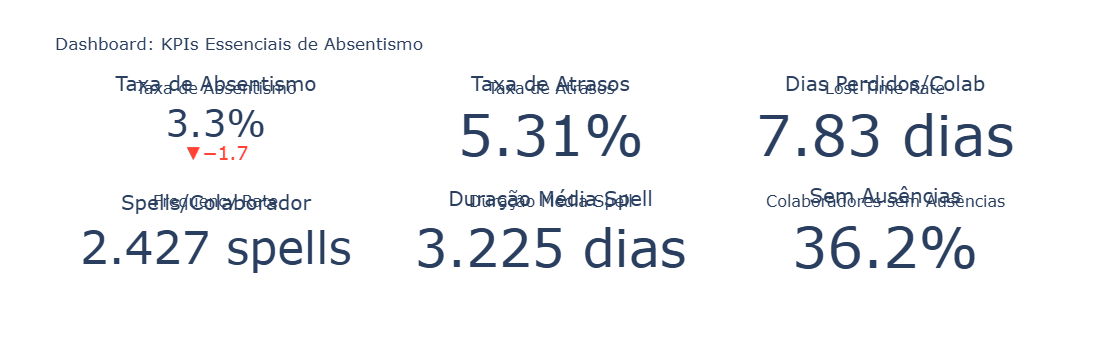

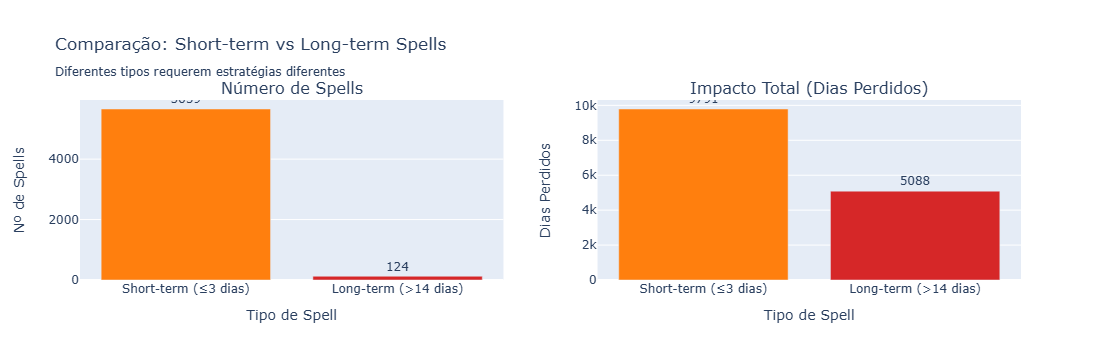


✓ Visualizações de KPIs criadas


In [82]:
# VIZ 1: Dashboard de KPIs principais (cards visuais)
from plotly.subplots import make_subplots

fig_kpis = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
           [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]],
    subplot_titles=('Taxa de Absentismo', 'Taxa de Atrasos', 'Lost Time Rate',
                    'Frequency Rate', 'Duração Média Spell', 'Colaboradores sem Ausências')
)

# KPI 1: Taxa de Absentismo
fig_kpis.add_trace(go.Indicator(
    mode="number+delta",
    value=taxa_absentismo_global,
    delta={'reference': 5, 'relative': False},  # Benchmark: 5% (típico para call centers)
    number={'suffix': "%"},
    title={'text': "Taxa de Absentismo"},
    domain={'x': [0, 1], 'y': [0, 1]}
), row=1, col=1)

# KPI 2: Taxa de Atrasos
fig_kpis.add_trace(go.Indicator(
    mode="number",
    value=taxa_atrasos,
    number={'suffix': "%"},
    title={'text': "Taxa de Atrasos"}
), row=1, col=2)

# KPI 3: Lost Time Rate
fig_kpis.add_trace(go.Indicator(
    mode="number",
    value=lost_time_rate,
    number={'suffix': " dias"},
    title={'text': "Dias Perdidos/Colab"}
), row=1, col=3)

# KPI 4: Frequency Rate
fig_kpis.add_trace(go.Indicator(
    mode="number",
    value=frequency_rate,
    number={'suffix': " spells"},
    title={'text': "Spells/Colaborador"}
), row=2, col=1)

# KPI 5: Mean Spell Duration
fig_kpis.add_trace(go.Indicator(
    mode="number",
    value=mean_spell_duration,
    number={'suffix': " dias"},
    title={'text': "Duração Média Spell"}
), row=2, col=2)

# KPI 6: Taxa Zero Ausências
fig_kpis.add_trace(go.Indicator(
    mode="number",
    value=taxa_zero_ausencias,
    number={'suffix': "%"},
    title={'text': "Sem Ausências"}
), row=2, col=3)

fig_kpis.update_layout(
    title_text='Dashboard: KPIs Essenciais de Absentismo',
    height=600
)

fig_kpis.show()

# VIZ 2: Comparação Short-term vs Long-term spells (impacto diferente)
spell_impact = pd.DataFrame({
    'Tipo': ['Short-term\n(≤3 dias)', 'Long-term\n(>14 dias)'],
    'Número de Spells': [
        df_spells['short_term'].sum(),
        df_spells['long_term'].sum()
    ],
    'Total de Dias': [
        df_spells[df_spells['short_term']]['duracao_dias'].sum(),
        df_spells[df_spells['long_term']]['duracao_dias'].sum()
    ]
})

fig_impact = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Número de Spells', 'Impacto Total (Dias Perdidos)')
)

fig_impact.add_trace(
    go.Bar(
        x=spell_impact['Tipo'],
        y=spell_impact['Número de Spells'],
        marker_color=['#ff7f0e', '#d62728'],
        text=spell_impact['Número de Spells'],
        textposition='outside'
    ),
    row=1, col=1
)

fig_impact.add_trace(
    go.Bar(
        x=spell_impact['Tipo'],
        y=spell_impact['Total de Dias'],
        marker_color=['#ff7f0e', '#d62728'],
        text=spell_impact['Total de Dias'],
        textposition='outside'
    ),
    row=1, col=2
)

fig_impact.update_xaxes(title_text="Tipo de Spell", row=1, col=1)
fig_impact.update_xaxes(title_text="Tipo de Spell", row=1, col=2)
fig_impact.update_yaxes(title_text="Nº de Spells", row=1, col=1)
fig_impact.update_yaxes(title_text="Dias Perdidos", row=1, col=2)

fig_impact.update_layout(
    title_text='Comparação: Short-term vs Long-term Spells<br><sub>Diferentes tipos requerem estratégias diferentes</sub>',
    height=500,
    showlegend=False
)

fig_impact.show()

print('\n✓ Visualizações de KPIs criadas')

### 4.3: Análise Específica de Atrasos

In [84]:
# Filtrar apenas atrasos do df_atrasos (que já existe do Grupo 1)
df_atrasos_analise = df_atrasos[df_atrasos['Nivel 1'] == 'Atraso'].copy()

print(f'\nTotal de registos de atraso: {len(df_atrasos_analise):,}')

if len(df_atrasos_analise) > 0:
    print(f'Colaboradores com atrasos: {df_atrasos_analise["login_colaborador"].nunique():,}')

    # Análise por colaborador
    atrasos_por_colab = df_atrasos_analise.groupby('login_colaborador').agg({
        'Data': 'count',
        'nome_colaborador': 'first',
        'categoria_profissional': 'first'
    }).rename(columns={'Data': 'num_atrasos'}).sort_values('num_atrasos', ascending=False)

    print(f'\n📊 Estatísticas:')
    print(f'   Média: {atrasos_por_colab["num_atrasos"].mean():.1f} atrasos/colaborador')
    print(f'   Mediana: {atrasos_por_colab["num_atrasos"].median():.0f}')
    print(f'   P75: {atrasos_por_colab["num_atrasos"].quantile(0.75):.0f}')
    print(f'   P95: {atrasos_por_colab["num_atrasos"].quantile(0.95):.0f}')
    print(f'   Máximo: {atrasos_por_colab["num_atrasos"].max():.0f}')

    # Top 10
    print(f'\n🔝 TOP 10 COLABORADORES COM MAIS ATRASOS:')
    print('\nPos | Nome                                     | Atrasos | Categoria')
    print('-' * 85)
    for idx, (login, row) in enumerate(atrasos_por_colab.head(10).iterrows(), 1):
        print(f'{idx:3d} | {row["nome_colaborador"][:40]:40s} | {row["num_atrasos"]:7.0f} | {str(row["categoria_profissional"])[:20]:20s}')

else:
    print('⚠️  Nenhum atraso encontrado no dataset')


Total de registos de atraso: 38,154
Colaboradores com atrasos: 2,258

📊 Estatísticas:
   Média: 16.9 atrasos/colaborador
   Mediana: 10
   P75: 24
   P95: 57
   Máximo: 193

🔝 TOP 10 COLABORADORES COM MAIS ATRASOS:

Pos | Nome                                     | Atrasos | Categoria
-------------------------------------------------------------------------------------
  1 | Regina Fernando                          |     193 | Auxiliar de Limpeza 
  2 | Ivandro Cláudio Paulino Neto             |     164 | Assistente de Contac
  3 | Ivanilson Gaudêncio Pinto                |     158 | Técnico Projetos Tec
  4 | Jiovann Manuel Correia Meti              |     118 | Assistente de Contac
  5 | Adilson Bole                             |     117 | Assistente de Contac
  6 | Armolindo Cristóvão                      |     109 | Assistente de Contac
  7 | Abraão Daniel                            |     108 | Assistente de Contac
  8 | Ludimila Quitamba Raimundo               |     103 | Assistent

### 4.4: Visualizações de Atrasos


4.4 Criando visualizações de atrasos...


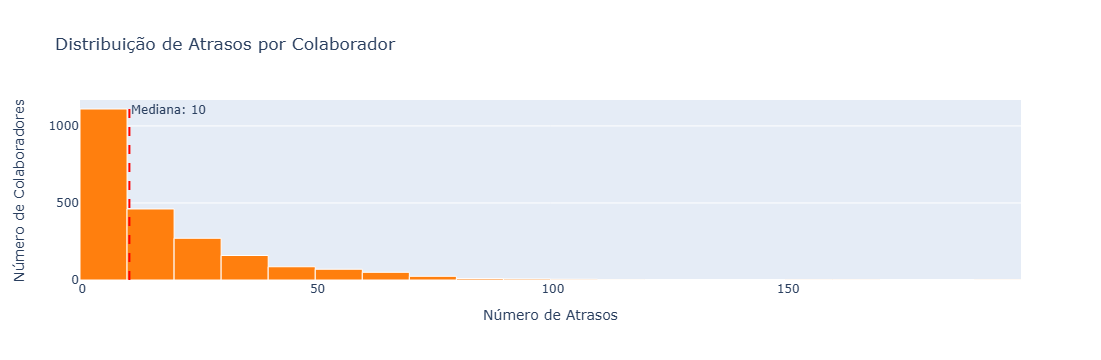

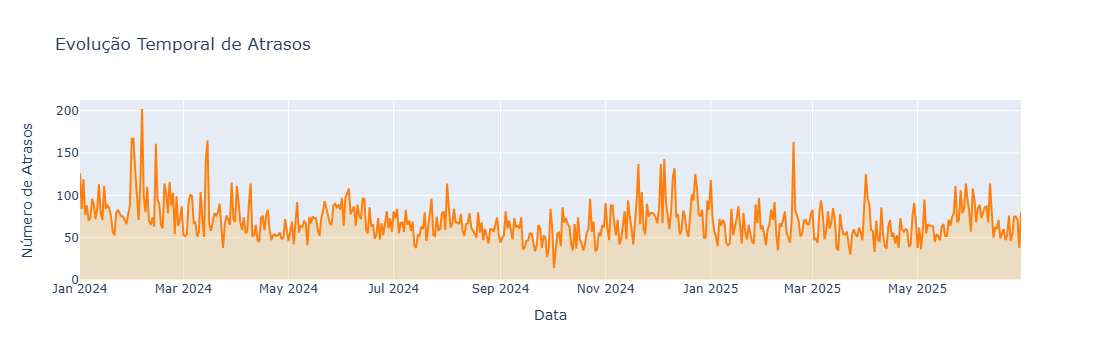

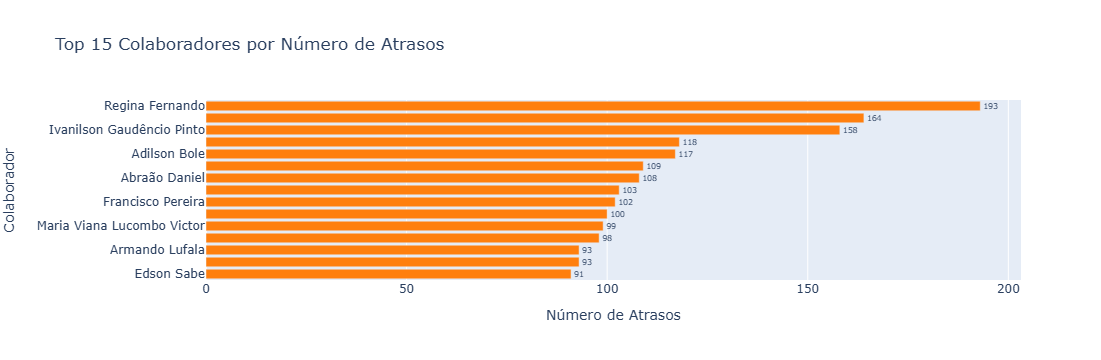


✓ Visualizações de atrasos criadas

GRUPO 4 CONCLUÍDO


In [86]:
if len(df_atrasos_analise) > 0:
    print('\n4.4 Criando visualizações de atrasos...')
    
    # VIZ 1: Distribuição de atrasos por colaborador
    fig_atr1 = go.Figure()
    fig_atr1.add_trace(go.Histogram(
        x=atrasos_por_colab['num_atrasos'],
        nbinsx=30,
        marker_color='#ff7f0e',
        marker_line_color='white',
        marker_line_width=1
    ))
    fig_atr1.update_layout(
        title='Distribuição de Atrasos por Colaborador',
        xaxis_title='Número de Atrasos',
        yaxis_title='Número de Colaboradores',
        height=450
    )
    fig_atr1.add_vline(
        x=atrasos_por_colab['num_atrasos'].median(),
        line_dash="dash",
        line_color="red",
        annotation_text=f"Mediana: {atrasos_por_colab['num_atrasos'].median():.0f}"
    )
    fig_atr1.show()

    # VIZ 2: Evolução temporal de atrasos
    atrasos_por_data = df_atrasos_analise.groupby('Data').size().reset_index(name='num_atrasos')

    fig_atr2 = go.Figure()
    fig_atr2.add_trace(go.Scatter(
        x=atrasos_por_data['Data'],
        y=atrasos_por_data['num_atrasos'],
        mode='lines',
        line=dict(color='#ff7f0e', width=2),
        fill='tozeroy',
        fillcolor='rgba(255,165,0,0.2)'
    ))
    fig_atr2.update_layout(
        title='Evolução Temporal de Atrasos',
        xaxis_title='Data',
        yaxis_title='Número de Atrasos',
        height=450,
        hovermode='x unified'
    )
    fig_atr2.show()

    # VIZ 3: Top 15 colaboradores com mais atrasos (barras horizontais)
    top15_atrasos = atrasos_por_colab.head(15).sort_values('num_atrasos')

    fig_atr3 = go.Figure()
    fig_atr3.add_trace(go.Bar(
        y=[nome[:30] for nome in top15_atrasos['nome_colaborador']],
        x=top15_atrasos['num_atrasos'],
        orientation='h',
        marker_color='#ff7f0e',
        text=top15_atrasos['num_atrasos'].astype(int),
        textposition='outside'
    ))
    fig_atr3.update_layout(
        title='Top 15 Colaboradores por Número de Atrasos',
        xaxis_title='Número de Atrasos',
        yaxis_title='Colaborador',
        height=600,
        margin=dict(l=200)
    )
    fig_atr3.show()

    print('\n✓ Visualizações de atrasos criadas')

print('\n' + '='*70)
print('GRUPO 4 CONCLUÍDO')
print('='*70)

### 4.5 Análise de Sazonalidade nos Atrasos

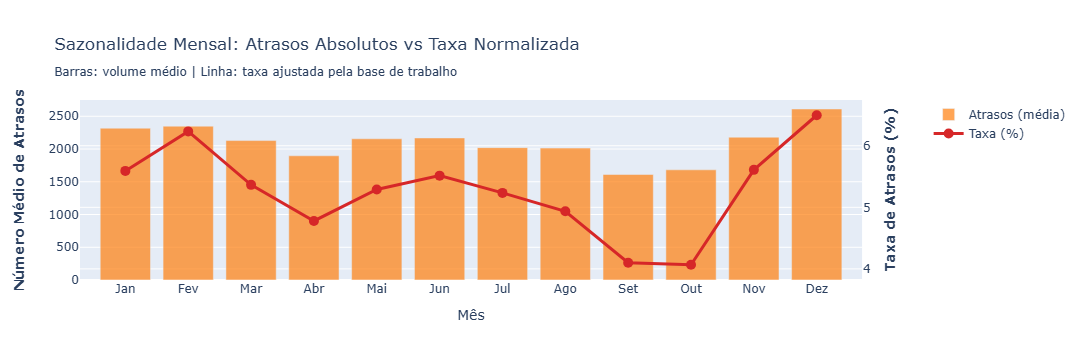

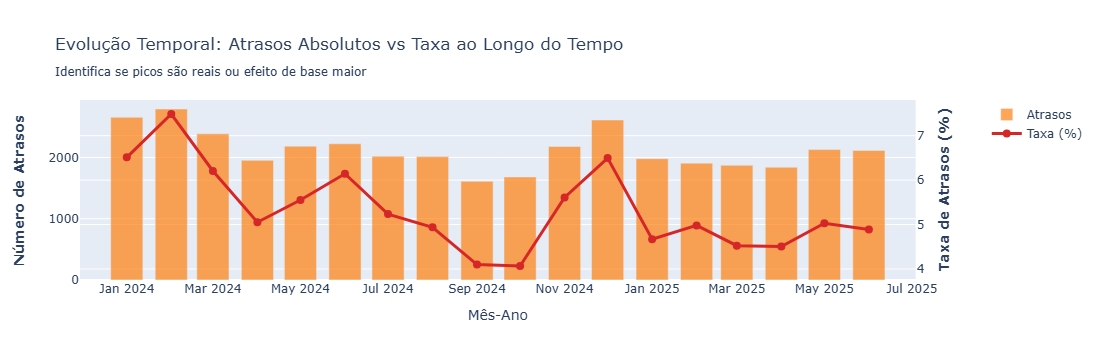

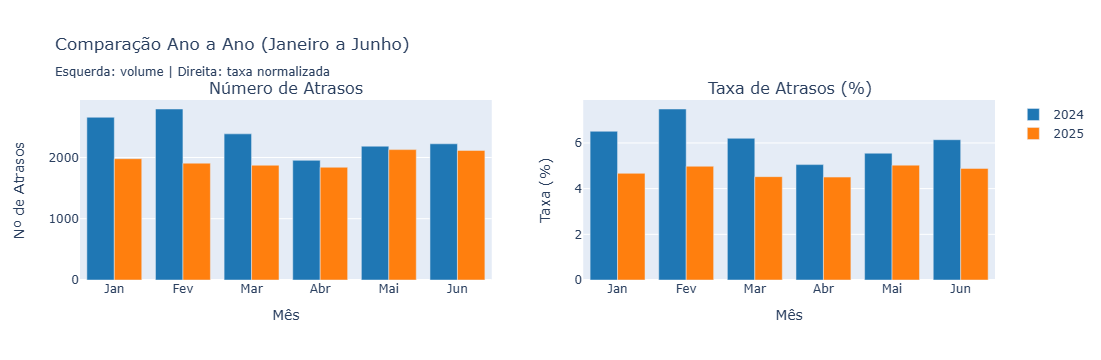


Análise de Sazonalidade:

Meses com MAIOR taxa de atrasos (média):
   Dez: 6.50% (2611 atrasos em média)
   Fev: 6.23% (2349 atrasos em média)
   Nov: 5.61% (2180 atrasos em média)

Meses com MENOR taxa de atrasos (média):
   Out: 4.07% (1682 atrasos em média)
   Set: 4.10% (1611 atrasos em média)
   Abr: 4.78% (1896 atrasos em média)

Comparação entre anos (Jan-Jun):
   2024: 2365.3 atrasos/mês | Taxa média: 6.16%
   2025: 1973.8 atrasos/mês | Taxa média: 4.77%
   Tendência: Redução de 22.6% em 2025 vs 2024

✓ Análise de sazonalidade concluída


In [88]:
if len(df_atrasos_analise) > 0:
    
    # Adicionar features temporais
    df_atrasos_temp = df_atrasos_analise.copy()
    df_atrasos_temp['ano_mes'] = df_atrasos_temp['Data'].dt.to_period('M').astype(str)
    df_atrasos_temp['mes'] = df_atrasos_temp['Data'].dt.month
    df_atrasos_temp['ano'] = df_atrasos_temp['Data'].dt.year
    df_atrasos_temp['dia_semana'] = df_atrasos_temp['Data'].dt.day_name()
    
    # Preparar base de trabalho pago (denominador)
    df_trabalho_temp = df_base_absentismo[df_base_absentismo['Nivel 1'] == 'Trabalho Pago'].copy()
    df_trabalho_temp['ano_mes'] = df_trabalho_temp['Data'].dt.to_period('M').astype(str)
    df_trabalho_temp['mes'] = df_trabalho_temp['Data'].dt.month
    df_trabalho_temp['ano'] = df_trabalho_temp['Data'].dt.year
    
    # VIZ 1: Atrasos MÉDIOS por mês com taxa normalizada (duplo eixo)
    # Calcular atrasos e base por mês-ano
    atrasos_por_mes_ano = df_atrasos_temp.groupby(['ano', 'mes']).size().reset_index(name='num_atrasos')
    trabalho_por_mes_ano = df_trabalho_temp.groupby(['ano', 'mes']).size().reset_index(name='base_trabalho')
    
    # Merge para calcular taxa
    dados_mes_ano = atrasos_por_mes_ano.merge(trabalho_por_mes_ano, on=['ano', 'mes'], how='left')
    dados_mes_ano['taxa_atrasos'] = (dados_mes_ano['num_atrasos'] / dados_mes_ano['base_trabalho'] * 100).fillna(0)
    
    # Calcular MÉDIA por mês (considerando múltiplas ocorrências)
    atrasos_medio_por_mes = dados_mes_ano.groupby('mes')['num_atrasos'].mean().reindex(range(1, 13), fill_value=0)
    taxa_media_por_mes = dados_mes_ano.groupby('mes')['taxa_atrasos'].mean().reindex(range(1, 13), fill_value=0)
    
    meses_pt = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    
    # Gráfico com duplo eixo
    fig_saz1 = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Barras: Número médio de atrasos
    fig_saz1.add_trace(
        go.Bar(
            x=meses_pt,
            y=atrasos_medio_por_mes.values,
            name='Atrasos (média)',
            marker_color='#ff7f0e',
            opacity=0.7
        ),
        secondary_y=False
    )
    
    # Linha: Taxa média de atrasos
    fig_saz1.add_trace(
        go.Scatter(
            x=meses_pt,
            y=taxa_media_por_mes.values,
            name='Taxa (%)',
            mode='lines+markers',
            line=dict(color='#d62728', width=3),
            marker=dict(size=10)
        ),
        secondary_y=True
    )
    
    fig_saz1.update_xaxes(title_text="Mês")
    fig_saz1.update_yaxes(title_text="<b>Número Médio de Atrasos</b>", secondary_y=False)
    fig_saz1.update_yaxes(title_text="<b>Taxa de Atrasos (%)</b>", secondary_y=True)
    
    fig_saz1.update_layout(
        title_text='Sazonalidade Mensal: Atrasos Absolutos vs Taxa Normalizada<br><sub>Barras: volume médio | Linha: taxa ajustada pela base de trabalho</sub>',
        height=500,
        hovermode='x unified'
    )
    
    fig_saz1.show()
    
    # VIZ 2: Evolução temporal com taxa (duplo eixo)
    atrasos_timeline = df_atrasos_temp.groupby('ano_mes').size().reset_index(name='num_atrasos')
    trabalho_timeline = df_trabalho_temp.groupby('ano_mes').size().reset_index(name='base_trabalho')
    
    dados_timeline = atrasos_timeline.merge(trabalho_timeline, on='ano_mes', how='left')
    dados_timeline['taxa_atrasos'] = (dados_timeline['num_atrasos'] / dados_timeline['base_trabalho'] * 100).fillna(0)
    
    fig_saz2 = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Barras: Número de atrasos
    fig_saz2.add_trace(
        go.Bar(
            x=dados_timeline['ano_mes'],
            y=dados_timeline['num_atrasos'],
            name='Atrasos',
            marker_color='#ff7f0e',
            opacity=0.7
        ),
        secondary_y=False
    )
    
    # Linha: Taxa de atrasos
    fig_saz2.add_trace(
        go.Scatter(
            x=dados_timeline['ano_mes'],
            y=dados_timeline['taxa_atrasos'],
            name='Taxa (%)',
            mode='lines+markers',
            line=dict(color='#d62728', width=3),
            marker=dict(size=8)
        ),
        secondary_y=True
    )
    
    fig_saz2.update_xaxes(title_text="Mês-Ano")
    fig_saz2.update_yaxes(title_text="<b>Número de Atrasos</b>", secondary_y=False)
    fig_saz2.update_yaxes(title_text="<b>Taxa de Atrasos (%)</b>", secondary_y=True)
    
    fig_saz2.update_layout(
        title_text='Evolução Temporal: Atrasos Absolutos vs Taxa ao Longo do Tempo<br><sub>Identifica se picos são reais ou efeito de base maior</sub>',
        height=500,
        hovermode='x unified'
    )
    
    fig_saz2.show()
    
    # VIZ 3: Comparação Ano a Ano com taxa (apenas Jan-Jun)
    anos_disponiveis = sorted(dados_mes_ano['ano'].unique())
    
    if len(anos_disponiveis) >= 2:
        # Filtrar apenas meses 1-6 que existem em ambos os anos
        df_comparacao = dados_mes_ano[dados_mes_ano['mes'] <= 6].copy()
        
        fig_saz3 = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Número de Atrasos', 'Taxa de Atrasos (%)'),
            specs=[[{"secondary_y": False}, {"secondary_y": False}]]
        )
        
        cores = ['#1f77b4', '#ff7f0e', '#2ca02c']
        
        # Subplot 1: Valores absolutos
        for i, ano in enumerate(anos_disponiveis):
            dados_ano = df_comparacao[df_comparacao['ano'] == ano]
            fig_saz3.add_trace(
                go.Bar(
                    x=[meses_pt[m-1] for m in dados_ano['mes']],
                    y=dados_ano['num_atrasos'],
                    name=str(ano),
                    marker_color=cores[i],
                    showlegend=True
                ),
                row=1, col=1
            )
        
        # Subplot 2: Taxas
        for i, ano in enumerate(anos_disponiveis):
            dados_ano = df_comparacao[df_comparacao['ano'] == ano]
            fig_saz3.add_trace(
                go.Bar(
                    x=[meses_pt[m-1] for m in dados_ano['mes']],
                    y=dados_ano['taxa_atrasos'],
                    name=str(ano),
                    marker_color=cores[i],
                    showlegend=False
                ),
                row=1, col=2
            )
        
        fig_saz3.update_xaxes(title_text="Mês", row=1, col=1)
        fig_saz3.update_xaxes(title_text="Mês", row=1, col=2)
        fig_saz3.update_yaxes(title_text="Nº de Atrasos", row=1, col=1)
        fig_saz3.update_yaxes(title_text="Taxa (%)", row=1, col=2)
        
        fig_saz3.update_layout(
            title_text='Comparação Ano a Ano (Janeiro a Junho)<br><sub>Esquerda: volume | Direita: taxa normalizada</sub>',
            height=500,
            barmode='group'
        )
        
        fig_saz3.show()
    
    # Análise estatística
    print('\nAnálise de Sazonalidade:')
    print(f'\nMeses com MAIOR taxa de atrasos (média):')
    top3_taxa = taxa_media_por_mes.nlargest(3)
    for mes, taxa in top3_taxa.items():
        atrasos = atrasos_medio_por_mes[mes]
        print(f'   {meses_pt[mes-1]:3s}: {taxa:.2f}% ({atrasos:.0f} atrasos em média)')
    
    print(f'\nMeses com MENOR taxa de atrasos (média):')
    bottom3_taxa = taxa_media_por_mes[taxa_media_por_mes > 0].nsmallest(3)
    for mes, taxa in bottom3_taxa.items():
        atrasos = atrasos_medio_por_mes[mes]
        print(f'   {meses_pt[mes-1]:3s}: {taxa:.2f}% ({atrasos:.0f} atrasos em média)')
    
    # Comparação entre anos (apenas Jan-Jun)
    if len(anos_disponiveis) >= 2:
        df_jan_jun = df_comparacao.copy()
        
        print(f'\nComparação entre anos (Jan-Jun):')
        for ano in anos_disponiveis:
            dados_ano = df_jan_jun[df_jan_jun['ano'] == ano]
            media_atrasos = dados_ano['num_atrasos'].mean()
            media_taxa = dados_ano['taxa_atrasos'].mean()
            print(f'   {ano}: {media_atrasos:.1f} atrasos/mês | Taxa média: {media_taxa:.2f}%')
        
        # Variação percentual
        if len(anos_disponiveis) == 2:
            ano1, ano2 = anos_disponiveis
            taxa_ano1 = df_jan_jun[df_jan_jun['ano'] == ano1]['taxa_atrasos'].mean()
            taxa_ano2 = df_jan_jun[df_jan_jun['ano'] == ano2]['taxa_atrasos'].mean()
            
            diff_pct = ((taxa_ano2 / taxa_ano1 - 1) * 100)
            
            if abs(diff_pct) < 5:
                print(f'   Tendência: Estável (variação de {diff_pct:+.1f}%)')
            elif diff_pct > 0:
                print(f'   Tendência: Aumento de {diff_pct:+.1f}% em {ano2} vs {ano1}')
            else:
                print(f'   Tendência: Redução de {abs(diff_pct):.1f}% em {ano2} vs {ano1}')
    
    print('\n✓ Análise de sazonalidade concluída')

### 4.6 Taxa de Atrasos por Dia da Semana (normalizada)

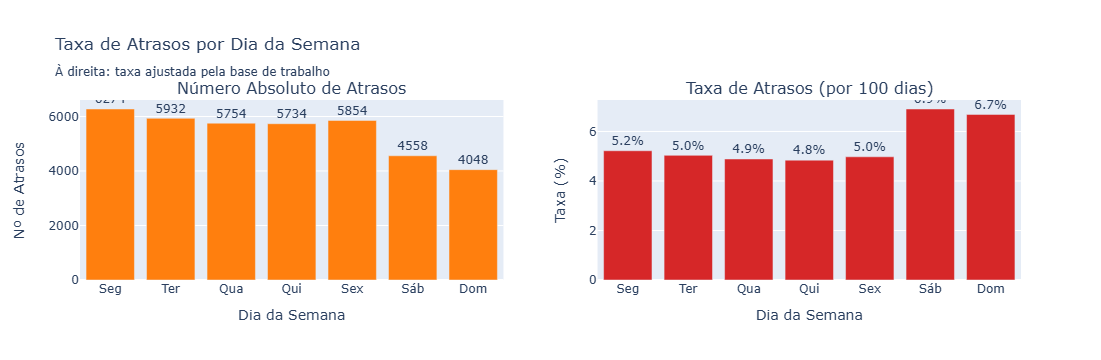


📊 Taxa de atrasos por dia da semana (por 100 dias de trabalho):

Dia       | Atrasos | Trabalho  | Taxa %
--------------------------------------------------
Seg       |    6274 |   120,181 |   5.22%
Ter       |    5932 |   117,817 |   5.03%
Qua       |    5754 |   117,717 |   4.89%
Qui       |    5734 |   118,426 |   4.84%
Sex       |    5854 |   117,639 |   4.98%
Sáb       |    4558 |    65,988 |   6.91%
Dom       |    4048 |    60,521 |   6.69%

⚠️  Dias com taxa acima da média (+10%): Sáb, Dom
   Possível padrão comportamental a investigar

✓ Análise de taxa por dia da semana concluída


In [90]:
if len(df_atrasos_analise) > 0:
    
    # Contar atrasos por dia da semana
    ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    atrasos_por_dia = df_atrasos_temp['dia_semana'].value_counts().reindex(ordem_dias, fill_value=0)
    
    # Calcular base (dias de trabalho pago) por dia da semana
    df_trabalho_temp = df_base_absentismo[df_base_absentismo['Nivel 1'] == 'Trabalho Pago'].copy()
    trabalho_por_dia = df_trabalho_temp.groupby('Dia_Semana').size().reindex(ordem_dias, fill_value=0)
    
    # Calcular taxa: atrasos por cada 100 dias de trabalho
    taxa_atrasos_por_dia = (atrasos_por_dia / trabalho_por_dia * 100).fillna(0)
    
    # Criar gráfico comparativo
    fig_atr_dia = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Número Absoluto de Atrasos', 'Taxa de Atrasos (por 100 dias)'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    dias_pt = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
    
    # Subplot 1: Valores absolutos
    fig_atr_dia.add_trace(
        go.Bar(
            x=dias_pt,
            y=atrasos_por_dia.values,
            marker_color='#ff7f0e',
            text=atrasos_por_dia.values,
            textposition='outside',
            name='Nº Atrasos'
        ),
        row=1, col=1
    )
    
    # Subplot 2: Taxa ajustada
    fig_atr_dia.add_trace(
        go.Bar(
            x=dias_pt,
            y=taxa_atrasos_por_dia.values,
            marker_color='#d62728',
            text=[f'{v:.1f}%' for v in taxa_atrasos_por_dia.values],
            textposition='outside',
            name='Taxa'
        ),
        row=1, col=2
    )
    
    fig_atr_dia.update_xaxes(title_text="Dia da Semana", row=1, col=1)
    fig_atr_dia.update_xaxes(title_text="Dia da Semana", row=1, col=2)
    fig_atr_dia.update_yaxes(title_text="Nº de Atrasos", row=1, col=1)
    fig_atr_dia.update_yaxes(title_text="Taxa (%)", row=1, col=2)
    
    fig_atr_dia.update_layout(
        title_text='Taxa de Atrasos por Dia da Semana<br><sub>À direita: taxa ajustada pela base de trabalho</sub>',
        height=500,
        showlegend=False
    )
    
    fig_atr_dia.show()
    
    # Mostrar insights
    print('\n📊 Taxa de atrasos por dia da semana (por 100 dias de trabalho):')
    print('\nDia       | Atrasos | Trabalho  | Taxa %')
    print('-' * 50)
    for i, dia in enumerate(ordem_dias):
        print(f'{dias_pt[i]:9s} | {atrasos_por_dia[dia]:7.0f} | {trabalho_por_dia[dia]:9,} | {taxa_atrasos_por_dia[dia]:6.2f}%')
    
    # Identificar dias com taxa anormalmente alta
    taxa_media = taxa_atrasos_por_dia.mean()
    dias_suspeitos = [dias_pt[i] for i, taxa in enumerate(taxa_atrasos_por_dia.values) if taxa > taxa_media * 1.1]
    
    if dias_suspeitos:
        print(f'\n⚠️  Dias com taxa acima da média (+10%): {", ".join(dias_suspeitos)}')
        print('   Possível padrão comportamental a investigar')
    
    print('\n✓ Análise de taxa por dia da semana concluída')